## Importing required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sat Jan 27 16:54:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
from tqdm import tqdm
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import load_img
from tensorflow.keras.layers import Dense, Flatten,Dropout,ReLU,BatchNormalization,Softmax
from tensorflow.keras.models import Model # Create a output sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Augmantation
from tensorflow.keras.applications.efficientnet import EfficientNetB7 #Make infrance from the model
from tensorflow.keras.preprocessing import image
# from keras.utils import plot_model  #Visualize Model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
check = ModelCheckpoint(
  '/content/drive/MyDrive/project deep 1/Models Weights/chrome model DL3 v2.h5',   verbose= 1,save_weights_only= False
)

In [ ]:
augmenter = ImageDataGenerator(rotation_range=30, horizontal_flip=True,width_shift_range=0.1,
                               height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,fill_mode='nearest')

In [ ]:
gen = augmenter.flow_from_directory('/content/drive/MyDrive/project deep 1/data',(255,255),"rgb")

Found 3425 images belonging to 6 classes.


In [ ]:
def build_network(base_model, classes):
    """
    build a new network from a pre-trained model

    parameters:
        -base_model: pretraind model
        -classes: number of classes to classify

    """
    x = Flatten()(base_model.output)
    x = Dense(units=255)(x)
    x = ReLU()(x)
    x = BatchNormalization()(x)
    x = Dense(units=200)(x)
    x = ReLU()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(units=classes)(x)
    output = Softmax()(x)
    return output


def create_model(CLASSES,input_shape = (500,500,3)):
  """
  Load the EfficientNetB7 models without the classifier part of the model.
  Freeze all layers, and adding output layers and train it.

  -------
  param:
    input_shape: image shape, It should have exactly 3 inputs channels.
    num_classes: number of classes to classify
  """

  # download the model and it's weights
  base_model = EfficientNetB7(weights='imagenet',include_top=False,input_shape=input_shape)
  # freeze layers
  for layer in base_model.layers[:-10]:
    layer.trainable = False

  model = build_network(base_model, CLASSES)
  model = Model(base_model.input, model)

  return model

model = create_model(6,(255,255,3))

258076736/258076736 [==============================] - 9s 0us/step


In [ ]:
# model = load_model('/content/drive/MyDrive/project deep 1/Models Weights/chrome model DL3.h5')

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-3),metrics=["accuracy"])

In [ ]:
model.fit_generator(gen,64,7,callbacks=[check])

Epoch 1/7
64/64 [==============================] - ETA: 0s - loss: 0.3057 - accuracy: 0.8945 
Epoch 1: saving model to /content/drive/MyDrive/project deep 1/Models Weights/chrome model DL3 v2.h5
64/64 [==============================] - 1981s 31s/step - loss: 0.3057 - accuracy: 0.8945
Epoch 2/7
 7/64 [==>...........................] - ETA: 28:22 - loss: 0.3693 - accuracy: 0.8884

In [ ]:
model.save('chrome model #4.h5')

<Axes: >

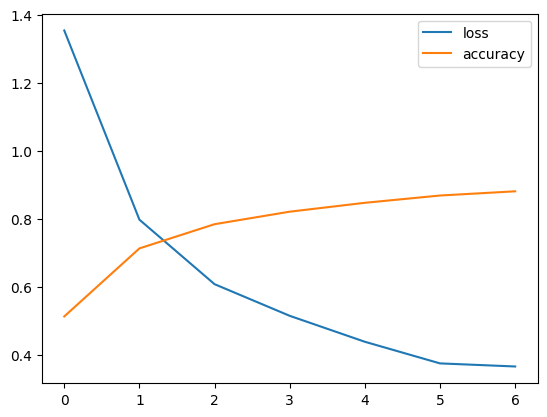

In [ ]:
import pandas as pd
pd.DataFrame(model.history.history).plot(kind='line')